In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [3]:
#Adding a region manually

# x = np.linspace(0.2, 5, 50)
# y = np.linspace(2*10**(-4),1*10**(-2), 300)
# xv, yv = np.meshgrid(x, y)

# outputfile="m-alpha_points/grid_0.2-5_2e-4-e-2.dat"

# with open(outputfile, 'w+') as fout:
#     fout.write("#m(phi) [GeV]\talpha\n")
#     np.savetxt(fout, np.transpose([xv.flatten(),yv.flatten()]), fmt='%7f')

# Plotting the exclusion scatter plot

In [60]:
# # general plotting function
# def plotGen(inputfile, lineScatterOrFill, color, linewidthORmarkersize):
#     data = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
#     data=data[np.argsort(data[:, 0])]
    
#     if (lineScatterOrFill=="line"):
#         plt.plot(data[:,0],data[:,1],c=color,linewidth=linewidthORmarkersize)
#     if (lineScatterOrFill=="scatter"):
#         plt.plot(data[:,0],data[:,1],c=color,s=linewidthORmarkersize)
#     if (lineScatterOrFill=="fill"):
#         plt.fill_between(data[:,0],data[:,1],10**(-2),color=color,linewidth=linewidthORmarkersize,alpha=0.5)

# #Plot all the data in folder
# def plotFromFolder(folder,iftoreverse,lineScatterOrFill,colorMAP,width):
#     colormap=colorMAP
    
#     #reading files with histos info (reverse fuction changes the order of the files)
#     files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
#     #print(files)
    
#     normalize = mcolors.Normalize(0, len(files))
    
#     global usedcolors
#     usedcolors=[]
#     for filenum, file in enumerate(files):
#         print(file)
        
#         plotGen(file,lineScatterOrFill,colormap(normalize(filenum)),width)
        
#         usedcolors.append(colormap(normalize(filenum)))
#     #print(usedcolors)
    
# function to plot the allowed/excluded points. It will be plotted in (x,y)-plane with
# the third parameter chosen as z=zfixed
def plotAllowed(inputfile,x,y,z,zfixed):
    inputparams = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
    
    #choosing only rows with z=zfixed
    zfixedonly=inputparams[:,z]==zfixed
    params=inputparams[zfixedonly]

    allowed=params[:,5]==1
    #print(params[allowed][0])
    #print(params[~allowed][0])

    plt.scatter(params[allowed,x], params[allowed,y], c='green')
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red')
    
# function that plots cut-out regions from 1612.07818

def whiteregions(m):
    return np.heaviside(m - 0.25,0)*np.heaviside(-m + 0.4,0) + np.heaviside(m - 0.5,0)*np.heaviside(-m + 2.9,0)\
    + np.heaviside(m - 3.2,0)*np.heaviside(-m + 3.6,0) + np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)

def plotWhiteRegions(yupper):
    m=np.linspace(0.2,5,num=10000);
    plt.fill_between(m,(1-whiteregions(m))*yupper,0,color="white",zorder=4)


# mass-tau plane

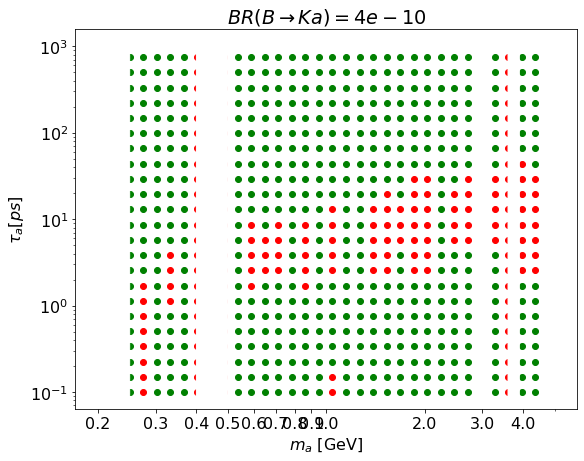

In [66]:
fig, ax = plt.subplots(figsize=(9, 7))
plotWhiteRegions(10**(3))

prodBR=4.000000e-10

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_full_comb.dat",0,1,3,prodBR)


ax.set_title('$BR(B\\rightarrow K a)={}$'.format(prodBR))
ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$\\tau_a [ps]$')
ax.set_xscale("log")
ax.set_yscale("log")
xtlabels=np.concatenate([np.arange(0.2,1,0.1),np.arange(1,5,1)])

ax.set_xticks(xtlabels)
ax.set_xticklabels(map(lambda x: f"{x:0.4}", xtlabels));

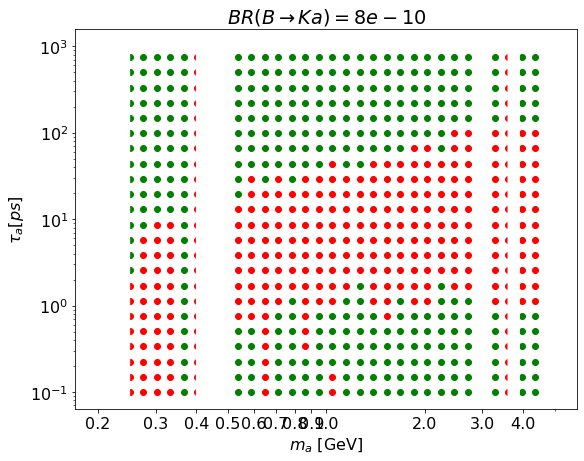

In [61]:
fig, ax = plt.subplots(figsize=(9, 7))
plotWhiteRegions(10**(3))

prodBR=8.000000e-10

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_full_comb.dat",0,1,3,prodBR)


ax.set_title('$BR(B\\rightarrow K a)={}$'.format(prodBR))
ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$\\tau_a [ps]$')
ax.set_xscale("log")
ax.set_yscale("log")
xtlabels=np.concatenate([np.arange(0.2,1,0.1),np.arange(1,5,1)])

ax.set_xticks(xtlabels)
ax.set_xticklabels(map(lambda x: f"{x:0.4}", xtlabels));

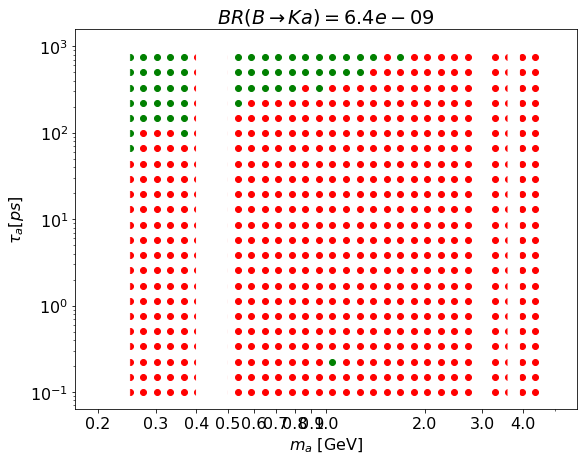

In [62]:
fig, ax = plt.subplots(figsize=(9, 7))
plotWhiteRegions(10**(3))

prodBR=6.400000e-09

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_full_comb.dat",0,1,3,prodBR)


ax.set_title('$BR(B\\rightarrow K a)={}$'.format(prodBR))
ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$\\tau_a [ps]$')
ax.set_xscale("log")
ax.set_yscale("log")
xtlabels=np.concatenate([np.arange(0.2,1,0.1),np.arange(1,5,1)])

ax.set_xticks(xtlabels)
ax.set_xticklabels(map(lambda x: f"{x:0.4}", xtlabels)); 

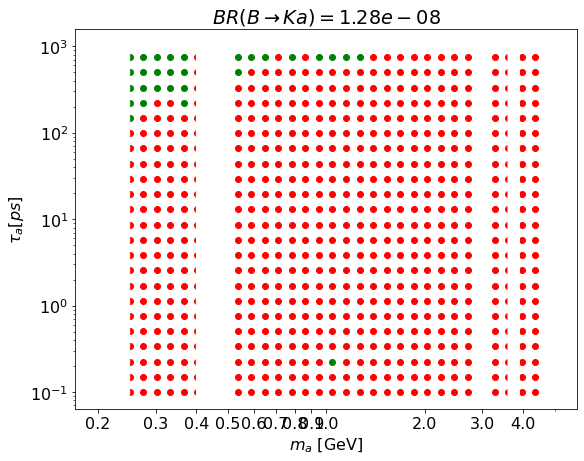

In [63]:
fig, ax = plt.subplots(figsize=(9, 7))
plotWhiteRegions(10**(3))

prodBR=1.280000e-08

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_full_comb.dat",0,1,3,prodBR)


ax.set_title('$BR(B\\rightarrow K a)={}$'.format(prodBR))
ax.set_xlabel('$m_a$ [GeV]')
ax.set_ylabel('$\\tau_a [ps]$')
ax.set_xscale("log")
ax.set_yscale("log")
xtlabels=np.concatenate([np.arange(0.2,1,0.1),np.arange(1,5,1)])

ax.set_xticks(xtlabels)
ax.set_xticklabels(map(lambda x: f"{x:0.4}", xtlabels)); 

# csb-tau plane

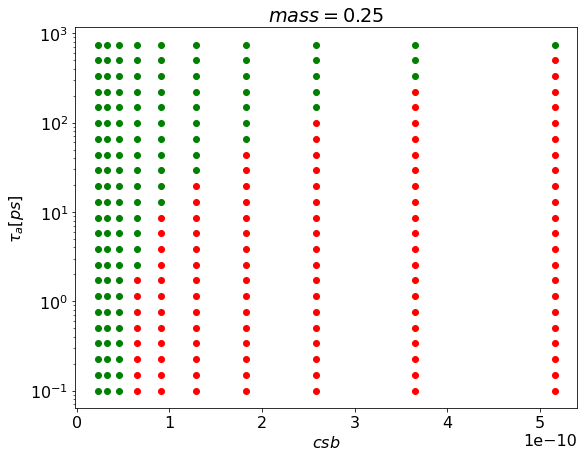

In [9]:
plt.figure(figsize=(9, 7))

mass=2.500000e-01

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_short_comb.dat",2,1,0,mass)


plt.title('$mass={}$'.format(mass))
plt.xlabel('$csb$')
plt.ylabel('$\\tau_a [ps]$')
plt.yscale("log")

# BR(B -> K a)-tau plane

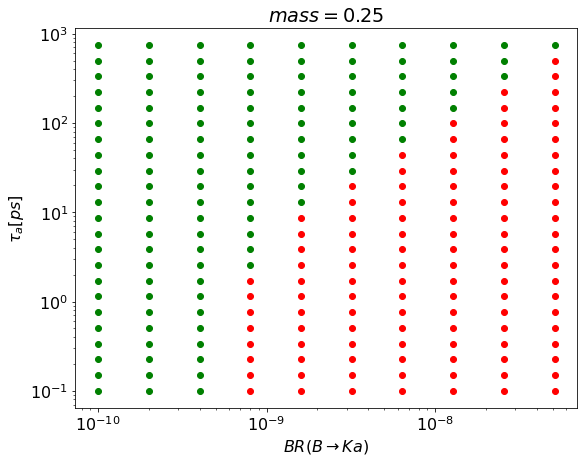

In [11]:
plt.figure(figsize=(9, 7))

mass=2.500000e-01

plotAllowed("Experimental_files/output_combined_R1/m-tau-cabs-BRBtoKmumu_short_comb.dat",3,1,0,mass)


plt.title('$mass={}$'.format(mass))
plt.xlabel('$BR(B\\rightarrow K a)$')
plt.ylabel('$\\tau_a [ps]$')
plt.xscale("log")
plt.yscale("log")